In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing required libraries
import pandas as pd  # For data manipulation and analysis using DataFrames
import numpy as np  # For numerical computing and array operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization

# Data splitting and preprocessing
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For data scaling and one-hot encoding

# Linear Regression model
from sklearn.linear_model import LinearRegression  # For linear regression

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For model evaluation

# Deep learning with Keras
from keras.models import Sequential  # For creating a sequential neural network model
from keras.layers import Dense  # For adding dense (fully connected) layers to the neural network

In [3]:
data = pd.read_csv('sensor.csv')
data = data[288:]
data

,Timestamp,IITK01,IITK02,IITK03,IITK04,IITK06,IITK07,IITK08,IITK10,IITK11,...,IITK15,IITK17,IITK18,IITK19,IITK20,IITK21,IITK22,IITK23,IITK24,IITK25
288,13-11-2022 00:00,NaN,92.75,97.750000,107.25,121.75,142.25,NaN,93.50,96.50,...,NaN,102.50,NaN,75.75,NaN,119.00,87.75,149.00,176.500000,90.75
289,13-11-2022 01:00,NaN,93.00,101.750000,107.00,117.75,139.50,NaN,91.25,98.25,...,NaN,107.75,NaN,72.00,NaN,105.50,92.00,154.50,152.000000,89.50
290,13-11-2022 02:00,NaN,94.50,86.666667,109.00,117.25,136.25,NaN,90.25,101.25,...,NaN,106.75,NaN,72.00,NaN,112.25,97.00,150.25,150.000000,89.75
291,13-11-2022 03:00,NaN,94.50,93.500000,109.25,117.50,145.00,NaN,95.00,111.00,...,NaN,107.50,NaN,76.75,NaN,128.75,102.50,151.00,163.500000,95.00
292,13-11-2022 04:00,NaN,94.50,89.250000,109.00,115.75,156.00,NaN,97.75,107.50,...,NaN,104.00,NaN,81.00,NaN,127.50,103.75,152.00,154.250000,93.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,30-11-2022 19:00,NaN,111.50,181.000000,154.50,92.75,271.75,NaN,102.50,200.25,...,156.75,142.25,199.25,121.25,157.00,NaN,NaN,145.25,123.666667,120.25
716,30-11-2022 20:00,NaN,115.50,205.250000,173.75,117.50,300.25,NaN,117.50,213.50,...,170.25,150.50,208.00,146.50,203.75,281.00,NaN,174.00,121.500000,129.25
717,30-11-2022 21:00,NaN,112.50,225.750000,178.50,134.75,343.75,NaN,122.50,236.25,...,213.00,142.50,218.50,162.75,160.50,288.25,NaN,183.50,128.000000,131.00
718,30-11-2022 22:00,NaN,125.25,265.750000,169.25,143.50,327.00,NaN,120.50,224.50,...,286.00,144.00,235.00,187.50,137.00,248.00,NaN,170.50,128.500000,125.25


In [4]:
data.describe()

,IITK01,IITK02,IITK03,IITK04,IITK06,IITK07,IITK08,IITK10,IITK11,IITK12,...,IITK15,IITK17,IITK18,IITK19,IITK20,IITK21,IITK22,IITK23,IITK24,IITK25
count,0.0,428.000000,417.000000,417.000000,405.000000,398.000000,0.0,411.000000,409.000000,427.000000,...,257.000000,377.000000,180.000000,253.000000,197.000000,395.000000,379.000000,408.000000,384.000000,400.000000
mean,NaN,85.769665,119.384093,101.419864,89.756996,129.783291,NaN,84.348946,113.034026,92.869438,...,95.506485,104.258842,112.754167,80.234519,88.949662,151.670253,96.710202,125.262255,108.163628,83.677917
std,NaN,35.712012,63.863700,50.388978,33.821033,61.086186,NaN,32.585235,51.386502,42.957121,...,47.037757,43.686006,57.029974,35.041673,41.863029,67.843403,50.386408,49.983507,38.095009,29.989503
min,NaN,23.500000,25.000000,24.000000,21.500000,36.500000,NaN,24.750000,31.000000,24.250000,...,26.750000,30.000000,24.750000,22.250000,22.250000,37.250000,21.500000,30.000000,28.000000,24.750000
25%,NaN,58.500000,68.500000,61.500000,58.500000,82.875000,NaN,58.000000,74.250000,57.750000,...,58.000000,67.000000,67.250000,52.500000,57.250000,102.000000,57.125000,81.187500,76.500000,57.437500
50%,NaN,86.500000,106.250000,96.750000,93.750000,124.250000,NaN,86.000000,105.250000,89.500000,...,89.000000,102.500000,106.000000,77.750000,81.750000,145.500000,87.750000,127.125000,108.875000,84.500000
75%,NaN,108.312500,152.250000,133.000000,117.250000,154.187500,NaN,103.000000,145.000000,120.375000,...,122.000000,137.000000,151.000000,97.000000,112.000000,185.500000,121.875000,156.500000,132.562500,105.437500
max,NaN,335.750000,362.500000,325.000000,173.500000,389.750000,NaN,202.750000,283.750000,293.500000,...,302.500000,278.750000,268.250000,189.500000,247.000000,411.000000,286.250000,359.750000,221.500000,166.750000


In [5]:
data_props = pd.read_csv('location.csv')
data_props

,S.No,Sensor No.,Serial No.,Location,Latitude,Longitude,Date of Installation
0,1,IITK-01,81432131001,Transport Nagar,26.779170,80.885063,13-12-2021
1,2,IITK-02,81432131016,Jankipuram,26.915201,80.942171,11-12-2021
2,3,IITK-03,81432131006,Nishat Ganj,26.865388,80.954702,11-12-2021
3,4,IITK-04,81432130003,Aliganj,26.901733,80.951876,11-12-2021
4,5,IITK-06,81432131013,Kakori,26.519931,80.235688,20-12-2021
5,6,IITK-07,81432130005,Rajendra Nagar-II,26.904335,80.765377,23-12-2021
6,7,IITK-08,81432131007,Charbagh,26.837670,80.934498,23-12-2021
7,8,IITK-10,81432131005,Husainabad,26.870196,80.904134,23-12-2021
8,9,IITK-11,81432131015,IITR-Hazratganj,26.859402,80.930709,25-12-2021
9,10,IITK-12,81432131004,Mahanagar,26.882188,80.950551,13-12-2021


In [6]:
# Convert the 'Timestamp' column from string format to pandas datetime format.
# The 'pd.to_datetime()' function is used for this conversion.
# The 'format' parameter is provided to specify the format of the input string.
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')
data['Timestamp']

288   2022-11-13 00:00:00
289   2022-11-13 01:00:00
290   2022-11-13 02:00:00
291   2022-11-13 03:00:00
292   2022-11-13 04:00:00
              ...        
715   2022-11-30 19:00:00
716   2022-11-30 20:00:00
717   2022-11-30 21:00:00
718   2022-11-30 22:00:00
719   2022-11-30 23:00:00
Name: Timestamp, Length: 432, dtype: datetime64[ns]

In [7]:
data['PM_Day'] = data['Timestamp'].dt.day
data['PM_Hour'] = data['Timestamp'].dt.hour
data['PM_Month'] = data['Timestamp'].dt.month
data

,Timestamp,IITK01,IITK02,IITK03,IITK04,IITK06,IITK07,IITK08,IITK10,IITK11,...,IITK19,IITK20,IITK21,IITK22,IITK23,IITK24,IITK25,PM_Day,PM_Hour,PM_Month
288,2022-11-13 00:00:00,NaN,92.75,97.750000,107.25,121.75,142.25,NaN,93.50,96.50,...,75.75,NaN,119.00,87.75,149.00,176.500000,90.75,13,0,11
289,2022-11-13 01:00:00,NaN,93.00,101.750000,107.00,117.75,139.50,NaN,91.25,98.25,...,72.00,NaN,105.50,92.00,154.50,152.000000,89.50,13,1,11
290,2022-11-13 02:00:00,NaN,94.50,86.666667,109.00,117.25,136.25,NaN,90.25,101.25,...,72.00,NaN,112.25,97.00,150.25,150.000000,89.75,13,2,11
291,2022-11-13 03:00:00,NaN,94.50,93.500000,109.25,117.50,145.00,NaN,95.00,111.00,...,76.75,NaN,128.75,102.50,151.00,163.500000,95.00,13,3,11
292,2022-11-13 04:00:00,NaN,94.50,89.250000,109.00,115.75,156.00,NaN,97.75,107.50,...,81.00,NaN,127.50,103.75,152.00,154.250000,93.50,13,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2022-11-30 19:00:00,NaN,111.50,181.000000,154.50,92.75,271.75,NaN,102.50,200.25,...,121.25,157.00,NaN,NaN,145.25,123.666667,120.25,30,19,11
716,2022-11-30 20:00:00,NaN,115.50,205.250000,173.75,117.50,300.25,NaN,117.50,213.50,...,146.50,203.75,281.00,NaN,174.00,121.500000,129.25,30,20,11
717,2022-11-30 21:00:00,NaN,112.50,225.750000,178.50,134.75,343.75,NaN,122.50,236.25,...,162.75,160.50,288.25,NaN,183.50,128.000000,131.00,30,21,11
718,2022-11-30 22:00:00,NaN,125.25,265.750000,169.25,143.50,327.00,NaN,120.50,224.50,...,187.50,137.00,248.00,NaN,170.50,128.500000,125.25,30,22,11


In [8]:
data_props = data_props.set_index('Sensor No.')
data_props

,S.No,Serial No.,Location,Latitude,Longitude,Date of Installation
Sensor No.,,,,,,
IITK-01,1,81432131001,Transport Nagar,26.779170,80.885063,13-12-2021
IITK-02,2,81432131016,Jankipuram,26.915201,80.942171,11-12-2021
IITK-03,3,81432131006,Nishat Ganj,26.865388,80.954702,11-12-2021
IITK-04,4,81432130003,Aliganj,26.901733,80.951876,11-12-2021
IITK-06,5,81432131013,Kakori,26.519931,80.235688,20-12-2021
IITK-07,6,81432130005,Rajendra Nagar-II,26.904335,80.765377,23-12-2021
IITK-08,7,81432131007,Charbagh,26.837670,80.934498,23-12-2021
IITK-10,8,81432131005,Husainabad,26.870196,80.904134,23-12-2021
IITK-11,9,81432131015,IITR-Hazratganj,26.859402,80.930709,25-12-2021


In [9]:
# assigning the values of the sensor no. column which is now index for data_props dataframe
data_props.index = ['IITK01', 'IITK02', 'IITK03', 'IITK04', 'IITK06', 'IITK07',
       'IITK08', 'IITK10', 'IITK11', 'IITK12', 'IITK13', 'IITK14',
       'IITK15', 'IITK16', 'IITK17', 'IITK18', 'IITK19', 'IITK20',
       'IITK21', 'IITK22', 'IITK23', 'IITK24', 'IITK25', 'IITK26', 'IITK28']
data_props.index

Index(['IITK01', 'IITK02', 'IITK03', 'IITK04', 'IITK06', 'IITK07', 'IITK08',
       'IITK10', 'IITK11', 'IITK12', 'IITK13', 'IITK14', 'IITK15', 'IITK16',
       'IITK17', 'IITK18', 'IITK19', 'IITK20', 'IITK21', 'IITK22', 'IITK23',
       'IITK24', 'IITK25', 'IITK26', 'IITK28'],
      dtype='object')

In [10]:
# Showing all rows and colum 1 to 28 of data's dataframe.
sensor_df = data.iloc[:,1:28]
sensor_df

,IITK01,IITK02,IITK03,IITK04,IITK06,IITK07,IITK08,IITK10,IITK11,IITK12,...,IITK19,IITK20,IITK21,IITK22,IITK23,IITK24,IITK25,PM_Day,PM_Hour,PM_Month
288,NaN,92.75,97.750000,107.25,121.75,142.25,NaN,93.50,96.50,97.75,...,75.75,NaN,119.00,87.75,149.00,176.500000,90.75,13,0,11
289,NaN,93.00,101.750000,107.00,117.75,139.50,NaN,91.25,98.25,100.75,...,72.00,NaN,105.50,92.00,154.50,152.000000,89.50,13,1,11
290,NaN,94.50,86.666667,109.00,117.25,136.25,NaN,90.25,101.25,94.75,...,72.00,NaN,112.25,97.00,150.25,150.000000,89.75,13,2,11
291,NaN,94.50,93.500000,109.25,117.50,145.00,NaN,95.00,111.00,94.75,...,76.75,NaN,128.75,102.50,151.00,163.500000,95.00,13,3,11
292,NaN,94.50,89.250000,109.00,115.75,156.00,NaN,97.75,107.50,91.50,...,81.00,NaN,127.50,103.75,152.00,154.250000,93.50,13,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,NaN,111.50,181.000000,154.50,92.75,271.75,NaN,102.50,200.25,131.25,...,121.25,157.00,NaN,NaN,145.25,123.666667,120.25,30,19,11
716,NaN,115.50,205.250000,173.75,117.50,300.25,NaN,117.50,213.50,146.00,...,146.50,203.75,281.00,NaN,174.00,121.500000,129.25,30,20,11
717,NaN,112.50,225.750000,178.50,134.75,343.75,NaN,122.50,236.25,151.00,...,162.75,160.50,288.25,NaN,183.50,128.000000,131.00,30,21,11
718,NaN,125.25,265.750000,169.25,143.50,327.00,NaN,120.50,224.50,140.75,...,187.50,137.00,248.00,NaN,170.50,128.500000,125.25,30,22,11


Motive: Reshape the DataFrame using `melt` function
`id_vars=['PM_Day', 'PM_Hour', 'PM_Month']`: These are the columns that will be retained as identifiers in the melted DataFrame
`value_vars=sensor_df.columns[:72]`: These are the columns to be melted (sensor readings columns)
`var_name='Sensor'`: This will be the new column name that will contain the sensor names
`value_name='Sensor_reading'`: This will be the new column name that will contain the sensor readings

In [11]:
# Converting rows of sensor names IITK01,IITK02... to a single column mapped with their individual sensors.
melted_sensor_df = sensor_df.melt(id_vars=['PM_Day', 'PM_Hour', 'PM_Month'],
                    value_vars=sensor_df.columns[:72],
                    var_name='Sensor',
                    value_name='Sensor_reading')
melted_sensor_df

,PM_Day,PM_Hour,PM_Month,Sensor,Sensor_reading
0,13,0,11,IITK01,NaN
1,13,1,11,IITK01,NaN
2,13,2,11,IITK01,NaN
3,13,3,11,IITK01,NaN
4,13,4,11,IITK01,NaN
...,...,...,...,...,...
9499,30,19,11,IITK25,120.25
9500,30,20,11,IITK25,129.25
9501,30,21,11,IITK25,131.00
9502,30,22,11,IITK25,125.25


Now we have two dataframe `melted_sensor_df` and `data_props` , where `melted_sensor_df` conatins sensor data at each hour mapped with their individual sensor names and `data_props` dataframe contains properties of sensors.
We have to merge these dataframes to get additional values in a single dataframe.

Merging the `melted_sensor_df` DataFrame with the `data_props`
1. DataFrame based on the 'Sensor' column as the left key and the index of `data_props` as the right key.
2. As we do in SQL, the 'left' join type is used, which means that all rows from the left DataFrame (`melted_sensor_df`) will be included in the result, and only matching rows from the right DataFrame (`data_props`) will be included.

In [12]:
final_df = melted_sensor_df.merge(data_props,left_on='Sensor', right_index=True, how='left')
final_df

,PM_Day,PM_Hour,PM_Month,Sensor,Sensor_reading,S.No,Serial No.,Location,Latitude,Longitude,Date of Installation
0,13,0,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,13-12-2021
1,13,1,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,13-12-2021
2,13,2,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,13-12-2021
3,13,3,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,13-12-2021
4,13,4,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,13-12-2021
...,...,...,...,...,...,...,...,...,...,...,...
9499,30,19,11,IITK25,120.25,23,81432147033,Kukrail_later_uppcb,26.90727,80.985200,30-03-2022
9500,30,20,11,IITK25,129.25,23,81432147033,Kukrail_later_uppcb,26.90727,80.985200,30-03-2022
9501,30,21,11,IITK25,131.00,23,81432147033,Kukrail_later_uppcb,26.90727,80.985200,30-03-2022
9502,30,22,11,IITK25,125.25,23,81432147033,Kukrail_later_uppcb,26.90727,80.985200,30-03-2022


In [13]:
final_df['Date of Installation'] = pd.to_datetime(final_df['Date of Installation'])
final_df

,PM_Day,PM_Hour,PM_Month,Sensor,Sensor_reading,S.No,Serial No.,Location,Latitude,Longitude,Date of Installation
0,13,0,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13
1,13,1,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13
2,13,2,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13
3,13,3,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13
4,13,4,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13
...,...,...,...,...,...,...,...,...,...,...,...
9499,30,19,11,IITK25,120.25,23,81432147033,Kukrail_later_uppcb,26.90727,80.985200,2022-03-30
9500,30,20,11,IITK25,129.25,23,81432147033,Kukrail_later_uppcb,26.90727,80.985200,2022-03-30
9501,30,21,11,IITK25,131.00,23,81432147033,Kukrail_later_uppcb,26.90727,80.985200,2022-03-30
9502,30,22,11,IITK25,125.25,23,81432147033,Kukrail_later_uppcb,26.90727,80.985200,2022-03-30


###### Calculate the time difference (in months) between the current date and the 'Date of Installation' for each row.
1. `pd.to_datetime('today')` gives the current date and time as a pandas Timestamp.
2. `(pd.to_datetime('today') - final_df['Date of Installation'])` calculates the time difference (timedelta) between the current date and each 'Date of Installation'.
3. The result of the timedelta division by `np.timedelta64(1, 'M')` converts the time difference to months. `np.timedelta64(1, 'M')` represents a time duration of one month in NumPy.
4. The above calculation results in a floating-point value representing the months, but we want to convert it to integers.
5. We use `.astype(int, errors='ignore')` to convert the floating-point values to integers and ignore any errors.
6. The 'errors' parameter is set to 'ignore' to ensure any invalid conversion (e.g., NaT values) doesn't raise an error.

In [14]:
final_df['Months since installation'] = ((pd.to_datetime('today') - final_df['Date of Installation']) / np.timedelta64(1, 'M')).astype(int, errors='ignore')
final_df

,PM_Day,PM_Hour,PM_Month,Sensor,Sensor_reading,S.No,Serial No.,Location,Latitude,Longitude,Date of Installation,Months since installation
0,13,0,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13,19
1,13,1,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13,19
2,13,2,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13,19
3,13,3,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13,19
4,13,4,11,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13,19
...,...,...,...,...,...,...,...,...,...,...,...,...
9499,30,19,11,IITK25,120.25,23,81432147033,Kukrail_later_uppcb,26.90727,80.985200,2022-03-30,15
9500,30,20,11,IITK25,129.25,23,81432147033,Kukrail_later_uppcb,26.90727,80.985200,2022-03-30,15
9501,30,21,11,IITK25,131.00,23,81432147033,Kukrail_later_uppcb,26.90727,80.985200,2022-03-30,15
9502,30,22,11,IITK25,125.25,23,81432147033,Kukrail_later_uppcb,26.90727,80.985200,2022-03-30,15


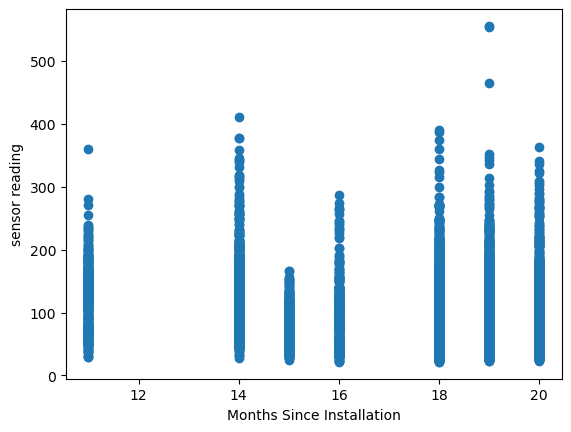

In [15]:
plt.scatter(final_df['Months since installation'], final_df['Sensor_reading'])
plt.xlabel('Months Since Installation')
plt.ylabel('sensor reading')
plt.show()

In [16]:
# final_df = final_df.drop(['Sensor','S.No','Serial No.', 'Location','Date of Installation','Months since installation'],axis = 1)
final_df = final_df.drop(['Sensor','S.No','Serial No.', 'Location','Date of Installation'],axis = 1)
final_df

,PM_Day,PM_Hour,PM_Month,Sensor_reading,Latitude,Longitude,Months since installation
0,13,0,11,NaN,26.77917,80.885063,19
1,13,1,11,NaN,26.77917,80.885063,19
2,13,2,11,NaN,26.77917,80.885063,19
3,13,3,11,NaN,26.77917,80.885063,19
4,13,4,11,NaN,26.77917,80.885063,19
...,...,...,...,...,...,...,...
9499,30,19,11,120.25,26.90727,80.985200,15
9500,30,20,11,129.25,26.90727,80.985200,15
9501,30,21,11,131.00,26.90727,80.985200,15
9502,30,22,11,125.25,26.90727,80.985200,15


In [17]:
final_df = final_df.dropna(subset=['Sensor_reading'])
final_df

,PM_Day,PM_Hour,PM_Month,Sensor_reading,Latitude,Longitude,Months since installation
432,13,0,11,92.75,26.915201,80.942171,20
433,13,1,11,93.00,26.915201,80.942171,20
434,13,2,11,94.50,26.915201,80.942171,20
435,13,3,11,94.50,26.915201,80.942171,20
436,13,4,11,94.50,26.915201,80.942171,20
...,...,...,...,...,...,...,...
9499,30,19,11,120.25,26.907270,80.985200,15
9500,30,20,11,129.25,26.907270,80.985200,15
9501,30,21,11,131.00,26.907270,80.985200,15
9502,30,22,11,125.25,26.907270,80.985200,15


In [18]:
sensor_data = final_df['Sensor_reading']
sensor_data

432      92.75
433      93.00
434      94.50
435      94.50
436      94.50
         ...  
9499    120.25
9500    129.25
9501    131.00
9502    125.25
9503    136.75
Name: Sensor_reading, Length: 7260, dtype: float64

In [19]:
final_df = final_df.drop('Sensor_reading', axis=1)
final_df

,PM_Day,PM_Hour,PM_Month,Latitude,Longitude,Months since installation
432,13,0,11,26.915201,80.942171,20
433,13,1,11,26.915201,80.942171,20
434,13,2,11,26.915201,80.942171,20
435,13,3,11,26.915201,80.942171,20
436,13,4,11,26.915201,80.942171,20
...,...,...,...,...,...,...
9499,30,19,11,26.907270,80.985200,15
9500,30,20,11,26.907270,80.985200,15
9501,30,21,11,26.907270,80.985200,15
9502,30,22,11,26.907270,80.985200,15


1. We define a function named `create_and_drop_dummies` that takes a DataFrame (df) and the name of the column to process (column_name).
2. Inside the function, we create dummy variables using `pd.get_dummies` for the specified column_name, set the appropriate prefix, and concatenate them to the original DataFrame df.
3. We then drop the original `column_name` from the DataFrame to remove redundant information since it is now represented by the dummy variables.

In [20]:
def create_and_drop_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    df.drop([column_name], axis=1, inplace=True)
    return df

final_df = create_and_drop_dummies(final_df, 'PM_Day')
final_df = create_and_drop_dummies(final_df, 'PM_Hour')
final_df = create_and_drop_dummies(final_df, 'PM_Month')

final_df

,Latitude,Longitude,Months since installation,PM_Day_13,PM_Day_14,PM_Day_15,PM_Day_16,PM_Day_17,PM_Day_18,PM_Day_19,...,PM_Hour_15,PM_Hour_16,PM_Hour_17,PM_Hour_18,PM_Hour_19,PM_Hour_20,PM_Hour_21,PM_Hour_22,PM_Hour_23,PM_Month_11
432,26.915201,80.942171,20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
433,26.915201,80.942171,20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
434,26.915201,80.942171,20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
435,26.915201,80.942171,20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
436,26.915201,80.942171,20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9499,26.907270,80.985200,15,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9500,26.907270,80.985200,15,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9501,26.907270,80.985200,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9502,26.907270,80.985200,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split( final_df,sensor_data, test_size=0.25, random_state=42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(5445, 46) (1815, 46) (5445,) (1815,)


In [22]:
# Scaling on the training and testing datasets. Used in ML to bring features to a similar range, which can lead to improved model performance.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Define the input shape of the model, 'input_shape' will be the number of features in the input data (X_train_scaled), here 46.
input_shape = X_train_scaled.shape[1]

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_shape,))) # dense (fully connected) layer with 64 neurons and ReLU activation function.
model.add(Dense(32, activation='relu')) # another dense layer with 32 neurons and ReLU activation function.
model.add(Dense(1, activation='linear')) # output layer with a single neuron and linear activation function.


# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3008      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


1. `epochs` specifies the number of times the entire training dataset will be passed through the model during training.
2. `batch_size` determines the number of samples that will be propagated through the network before the weights are updated.
3. `validation_split` is the proportion of training data that will be used for validation during training. For example, if set to 0.1, 10% of the training data will be used for validation, and the rest will be used for training.
4. `loss: x` : This is the training loss for the current epoch. The training loss is a measure of how well the model is performing on the training data. The value (x in this case) represents the mean absolute error (MAE) between the predicted values and the actual target values on the training data for that epoch. The goal is to minimize this loss during training.
5. `val_loss: y`: This is the validation loss for the current epoch. The validation loss is a measure of how well the model is performing on the validation data, which is a subset of the training data that was set aside for validation. The value (y in this case) represents the mean absolute error (MAE) on the validation data for that epoch. The purpose of validation is to monitor how well the model generalizes to unseen data and to detect overfitting. The goal is to minimize the validation loss as well.

In [24]:
# Train the model
history = model.fit(X_train_scaled, Y_train, epochs=60, batch_size=32, validation_split = 0.1)

Epoch 1/60
154/154 [==============================] - 1s 3ms/step - loss: 82.0155 - val_loss: 42.4630
Epoch 2/60
154/154 [==============================] - 0s 2ms/step - loss: 27.7418 - val_loss: 25.5892
Epoch 3/60
154/154 [==============================] - 0s 3ms/step - loss: 23.4789 - val_loss: 24.7659
Epoch 4/60
154/154 [==============================] - 0s 2ms/step - loss: 22.5037 - val_loss: 24.3432
Epoch 5/60
154/154 [==============================] - 0s 2ms/step - loss: 21.7538 - val_loss: 23.8383
Epoch 6/60
154/154 [==============================] - 0s 2ms/step - loss: 21.0816 - val_loss: 23.3108
Epoch 7/60
154/154 [==============================] - 0s 2ms/step - loss: 20.5480 - val_loss: 23.0666
Epoch 8/60
154/154 [==============================] - 0s 2ms/step - loss: 20.1041 - val_loss: 22.9126
Epoch 9/60
154/154 [==============================] - 0s 2ms/step - loss: 19.7341 - val_loss: 22.4923
Epoch 10/60
154/154 [==============================] - 0s 2ms/step - loss: 19.3937

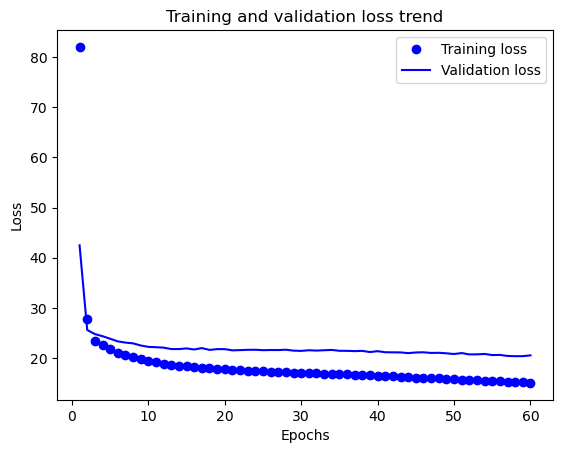

In [25]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss') # Plotting the training loss as blue circles 'bo'.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # Plotting the validation loss as a solid blue line 'b'.
plt.title('Training and validation loss trend')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Ideally, we want to see both the training and validation loss decrease over epochs, indicating that the model is learning and generalizing well. If the training loss continues to decrease while the validation loss starts to increase or stabilize, it could be an indication of overfitting, where the model is becoming too specific to the training data and not generalizing well to new data.

In [26]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, Y_test)

57/57 [==============================] - 0s 1ms/step - loss: 17.2610


In [27]:
y_pred = model.predict(X_test_scaled)
y_pred

57/57 [==============================] - 0s 2ms/step


array([[ 67.17667],
       [134.17545],
       [224.6273 ],
       ...,
       [160.39424],
       [219.0016 ],
       [162.51642]], dtype=float32)

In [28]:
# Using `ravel()` to flatten the 2D array into a 1D array.
y_pred = y_pred.ravel()
y_pred

array([ 67.17667, 134.17545, 224.6273 , ..., 160.39424, 219.0016 ,
       162.51642], dtype=float32)

In [29]:
Y_test

5652     69.75
4471    195.25
7733    342.00
3239     78.50
4117     27.50
         ...  
1805     58.50
1883     50.25
8934    132.25
8624    188.75
8190    157.25
Name: Sensor_reading, Length: 1815, dtype: float64

1. R-squared (R2) score is a common metric for evaluating the performance of regression models.
2. It is a value between 0 and 1, where 1 represents a perfect fit of the model to the data, and values closer to 0 indicate a poor fit.
3. A higher R2 score indicates a better fit of the model to the data, while a lower R2 score suggests that the model may not be effectively capturing the patterns in the data.

In [30]:
from sklearn.metrics import r2_score
r2_score(y_pred,Y_test)

0.621101001895776

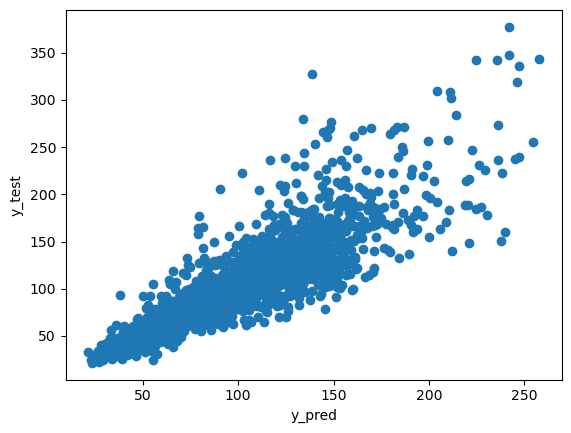

In [31]:
plt.scatter(y_pred, Y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

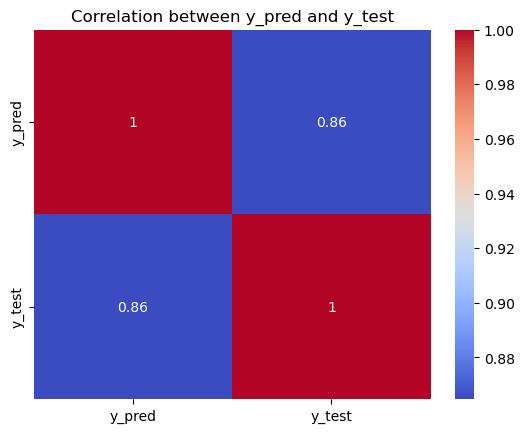

In [32]:
# Create a dataframe with the predicted and actual values
df = pd.DataFrame({'y_pred': y_pred, 'y_test': Y_test})

# Compute the correlation matrix
corr = df.corr()

# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Set the title and display the plot
plt.title('Correlation between y_pred and y_test')
plt.show()

The heatmap visualizes the correlation between the predicted and actual values. The values in the heatmap range from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation. The color scale ('coolwarm' in this case) represents the magnitude and direction of the correlation.

By analyzing the heatmap, you can gain insights into how well the predicted values (y_pred) correlate with the actual target values (y_test). A strong positive correlation (close to 1) indicates that the model's predictions align well with the true target values, while a weak or negative correlation may indicate that the model's predictions are less accurate.

In [33]:
# create a linear regression object and fit the model to the training data
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

# predict on the test data
y_pred = model.predict(X_test_scaled)

# calculate the mean squared error
mse = mean_absolute_error(Y_test, y_pred)
print('Mean Absolute Error:', mse)

print('Model Accuracy:', model.score(X_test_scaled, Y_test))

Mean Absolute Error: 23.988268686008972
Model Accuracy: 0.596789613945316
